# Space-Time Diagrams

Visualising events and processes over time

I wanted a clear way to visualise events over time when talking about how we do digital preservation.  As my background is in physics, I wondered whether a simple version of a space-time diagram would work.

While these diagrams are mostly used in [relativity](https://en.wikipedia.org/wiki/Minkowski_diagram) and [quantum mechanics](https://en.wikipedia.org/wiki/Feynman_diagram), they can also be used to visualise simple physical systems, as shown below:

![Examples of space-time plots, visualising simple physical systems.](./images/spacetime-plots-intro.png)

As you can see, if an object is not moving, then it traces our a simple line parallel with the time axes.  If the object is moving through space, then the line runs at an angle -- the steeper the line, the faster the object is moving. If you plot two objects colliding, then the lines converge until the two objects start to bounce off each other. The lines then curve away until the two objects are heading in opposite directions.

While the events in the history of a digital archive behave very differently, a space-time diagram still provide a useful way of visualising what's going on.

```{glue:figure} spacetime_oais_fig
:figwidth: 100%
:name: "spacetime_oais_fig"

Visualisation of the basic OAIS workflow as a space-time trajectory.
```

See {doc}`/patterns/contexts/index` for more examples.

Idea of generating space-time plots rather than making them by hand:

- Plot e.g. SIP/AIP/DIP trajectories, add annotations and tick marks for names and places.
- Highlight events [like the dots on these plots](https://matplotlib.org/3.3.0/gallery/text_labels_and_annotations/annotation_demo.html#using-multiple-coordinate-systems-and-axis-types)
- Highlight time periods [like this](https://datavizpyr.com/highlight-a-time-range-in-time-series-plot-in-python-with-matplotlib/)

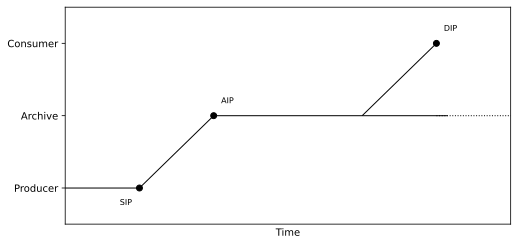

In [94]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Ellipse

plt.rc('font', size=10)

fig, ax=plt.subplots(figsize=[8,4])
ax.set_xlim([1,7])
ax.set_ylim([0.5,3.5])

ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Producer', 'Archive', 'Consumer'])
# No x-axis ticks
ax.set_xticks([])
ax.set_xlabel('Time')

l1 = [(1, 1), (2, 1), (3,2), (6,2), (6.15,2)]
l2 = [(5,2), (6, 3)]
l3 = [(6,2), (7,2)]
lc = LineCollection([l1, l2, l3], color="k", lw=1, linestyle=['-','-',':'])

ax.add_collection(lc)

# Add SIP:
plt.plot(2, 1, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('SIP', fontsize=8,
            xy=(2, 1), xycoords='data',
            xytext=(1.9, 0.85), textcoords='data',
            horizontalalignment='right', verticalalignment='top')

# Add AIP:
plt.plot(3, 2, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('AIP', fontsize=8,
            xy=(3, 2), xycoords='data',
            xytext=(3.1, 2.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

# Add DIP:
plt.plot(6, 3, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('DIP', fontsize=8,
            xy=(6, 3), xycoords='data',
            xytext=(6.1, 3.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

# Make this figure available for use in other pages:
from myst_nb import glue
glue("spacetime_oais_fig", fig, display=False)

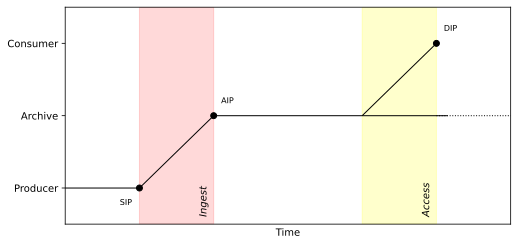

In [95]:
# Now highlight Ingest and Access:
ax.axvspan(2, 3, alpha=0.15, color='red', label='Ingest')
ax.annotate('Ingest', fontsize=10, rotation=90, style='italic',
            xy=(2.8, 0.6), xycoords='data',
            horizontalalignment='left', verticalalignment='bottom')

ax.axvspan(5, 6, alpha=0.2, color='yellow', label='Access')
ax.annotate('Access', fontsize=10, rotation=90, style='italic',
            xy=(5.8, 0.6), xycoords='data',
            horizontalalignment='left', verticalalignment='bottom')


# Make this modified figure available for use in other pages:
glue("spacetime_oais_fig_lit", fig, display=True)

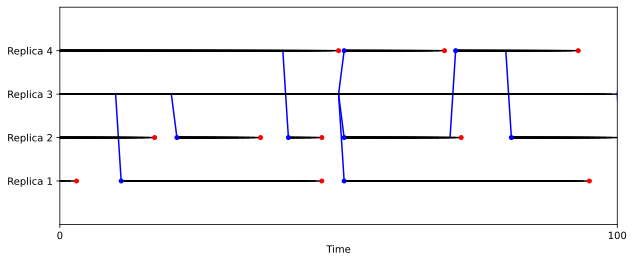

In [78]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Ellipse, Circle

# Parameters:
reps = 4
total_time = 100
death_chance = 0.02
check_period = 10
rng_seed = 10

# Plot setup:
fig, ax=plt.subplots(figsize=[10,reps])
ax.set_xlim([0,total_time])
ax.set_ylim([-1, reps])

ax.set_yticks(range(0, reps))
ylabels = []
for r in range(reps):
    ylabels.append('Replica %i' % (r + 1))
ax.set_yticklabels(ylabels)

# No x-axis ticks
ax.set_xticks([0, total_time])
#ax.set_xticks(range(0,20))
ax.set_xlabel('Time')

def add_line(l, c='k'):
    lc = LineCollection([l], color=c, zorder=5.0)
    ax.add_collection(lc)

def add_dot(pos, c='b'):
    plt.plot(pos[0], pos[1], marker='o', markersize=4, color=c, zorder=10.0)
    
def simulate_replication():
    # Storage for current trajectories:
    lines = []
    for r in range(reps):
        lines.append([])
    # Initial state - all replicated:
    state = [1] * reps
    
    # Loop over time:
    for t in range(0, total_time + 1):
        
        # Record current state:
        for r in range(reps):
            # If still alive, record it:
            if state[r]:
                lines[r].append([t,r])
                
        # Damage:
        for r in range(reps):
            # Decide if this replica gets damaged:
            if state[r] and np.random.uniform() < death_chance:
                # Add a death indicator:
                add_dot((t,r), c='r')
                # Update state:
                state[r] = 0
                # Plot the trajectory:
                if len(lines[r]) > 0:
                    add_line(lines[r])
                lines[r] = []

        # Periodically check and replicate:
        if t%check_period == 0:
            for r in range(reps):
                # Attempt to repair any damage:
                if not state[r]:
                    replist = list(range(reps))
                    np.random.shuffle(replist)
                    for r2 in replist:
                        if state[r2]:
                            # Record replication:
                            state[r] = state[r2]
                            # Show the preceding line and indicator:
                            add_line([[t,r2],[t+1,r]], 'b')
                            add_dot((t+1,r))
                            # No need to check other replicas:
                            break
                            
        # Add final trajectories:
        for r in range(reps):
            # Plot the trajectory:
            if len(lines[r]) > 1:
                add_line(lines[r])

# Run the simulation:
np.random.seed(rng_seed)
simulate_replication()

# Show the result:
plt.show()